In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd


# # create dataset
# X, y = make_blobs(
#    n_samples=150, n_features=2,
#    centers=3, cluster_std=0.5,
#    shuffle=True, random_state=0
# )

# Use list for data
variable1 = [1, 1, 5, 4, 4, 8, 8, 2]
variable2 = [5, 2, 8, 8, 9, 3, 2, 1]
dta = {"1st VARIABLE" : variable1, "2nd VARIABLE" : variable2}

df = pd.DataFrame(dta)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1st VARIABLE  8 non-null      int64
 1   2nd VARIABLE  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [3]:
X = df.iloc[:,[0, 1]]
print(X)

   1st VARIABLE  2nd VARIABLE
0             1             5
1             1             2
2             5             8
3             4             8
4             4             9
5             8             3
6             8             2
7             2             1


In [4]:
# train K-Means clustering
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

print(y_km)

[2 2 1 1 1 0 0 2]


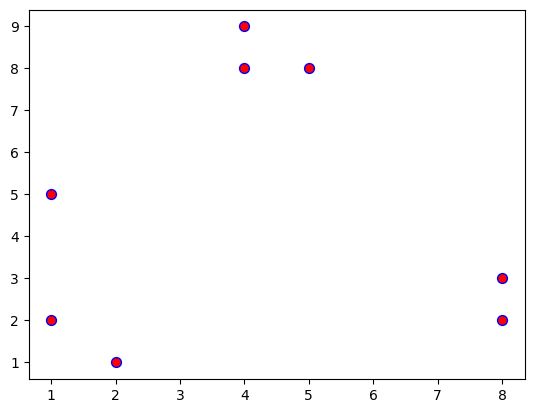

In [5]:
# plot
plt.scatter(
   variable1, variable2,
   c='red', marker='o',
   edgecolor='blue', s=50
)
plt.show()

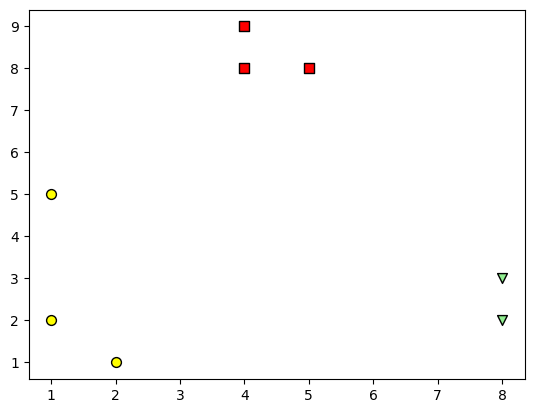

In [7]:
# 3 clusters plotted
plt.scatter(
    X.iloc[5:7,0], X.iloc[5:7,1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    X.iloc[2:5,0], X.iloc[2:5,1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='c2'
)

plt.scatter(
    X.iloc[[0,1,7],0], X.iloc[[0,1,7],1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='c3'
)

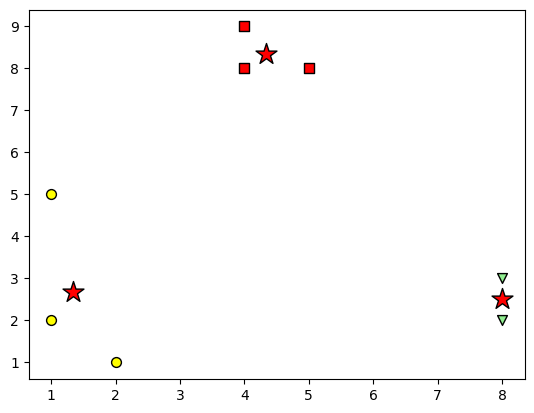

In [6]:
# 3 clusters plotted
plt.scatter(
    X.iloc[5:7,0], X.iloc[5:7,1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    X.iloc[2:5,0], X.iloc[2:5,1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='c2'
)

plt.scatter(
    X.iloc[[0,1,7],0], X.iloc[[0,1,7],1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='c3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [15]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

[126.375, 62.75, 11.166666666666668, 2.8333333333333335, 1.8333333333333335, 1.0, 0.5]


In [19]:
#finding the elbow using kneed locator

from kneed import KneeLocator
kl = KneeLocator(range(1, 8), distortions, curve="convex", direction="decreasing")
kl.elbow

3

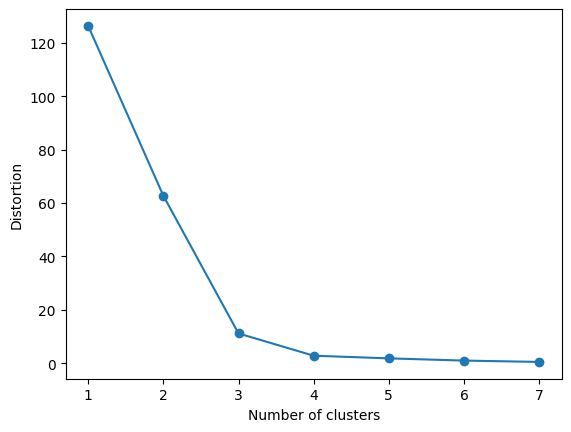

In [18]:
# plot
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()